In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import r2_score,confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve,cohen_kappa_score,f1_score,silhouette_samples,silhouette_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [2]:
pd.options.display.max_columns = None

# Step 3: Read the train and test data sets, and check for the datatypes.

In [3]:
train = pd.read_csv('train.csv')
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test = pd.read_csv('test.csv')
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
df = pd.concat([train.drop(columns = 'Credit_Score'),test],axis = 0) ## train and test data compilation and cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  ob

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000


## Correcting the datatypes and cleaning the attributes.

#### ID

In [8]:
df['ID'].nunique() ## There are 150000 unique values so we will make this column as index, or will delete this columns.

150000

In [9]:
df.set_index('ID',inplace = True)

#### Customer_ID

In [10]:
## Customer ID 
df['Customer_ID'].value_counts()
## No changes needs to be done in this columns as well.

CUS_0xd40     12
CUS_0x9bf4    12
CUS_0x5ae3    12
CUS_0xbe9a    12
CUS_0x4874    12
              ..
CUS_0x2eb4    12
CUS_0x7863    12
CUS_0x9d89    12
CUS_0xc045    12
CUS_0x942c    12
Name: Customer_ID, Length: 12500, dtype: int64

#### Month

In [11]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [12]:
df['Month'].nunique()
## This columns is correctly types and there are no changes need to be done

12

#### Age

In [13]:
## Age is incorrectly typed columns since it should be a int or object but it is object thus let's correct it
df['Age'].unique()

array(['23', '-500', '28_', ..., '326', '7910', '5826'], dtype=object)

In [14]:
df['Age'] = df['Age'].apply(lambda x : int(x.strip('_').strip('-')))
## Age can't be in negetive and also there are so many values which are greater than 100, which is practically not possible
## thus let's change them to median of the data.

In [15]:
df['Age'] = df['Age'].apply(lambda x : df['Age'].quantile(0.75) if x > 85 else x )
##here we have replaced all the values of age which were greater than 85. and also corrected the datatype of this attribute

#### SNN

In [16]:
## SSN attribute
df['SSN'].unique()
## Look's like this is a 9 digit number , thus we first we should remove the hyphen from the middle then look for some 
## anamolies in the feature.

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [17]:
df['SSN'] = df['SSN'].apply(lambda x: x.replace('-',''))
## Converter the values to all numbers
## Now let's look for irregularites in this attributes.

In [18]:
index_anomaly = []
for i in range(len(df['SSN'])):
    if not df['SSN'].iloc[i].isalnum():
        index_anomaly.append(i)

In [19]:
df['SSN'].value_counts()
## Mode of the data is also the anomoly value , thus replacing it with null value and then will treat the null values in 
## later steps.

#F%$D@*&8    8400
078735990      12
047161543      12
255398777      12
159517992      12
             ... 
414769835       7
695717676       7
803446289       7
074528105       7
642737670       6
Name: SSN, Length: 12501, dtype: int64

In [20]:
## Replacing the anomolies with null values and will treat it in null value analysis.
for i in index_anomaly:
    df.iloc[i,4] = np.NaN

In [21]:
df['SSN'] = df['SSN'].astype(float)
## correct the datatype of SNN Attribute and also removed the anomalies present in it.

#### Occupation

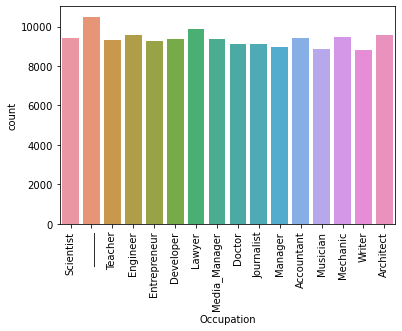

In [22]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=90);

In [23]:
df['Occupation'].unique()
## In occupation '_______' this should not be present. Let's replace it with the mode of the data.

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [24]:
df['Occupation'].mode()
## Mode of featre is the anomaly , thus let's replace it with the null value and will treat it in null value analysis.

0    _______
Name: Occupation, dtype: object

In [25]:
df['Occupation'].value_counts()

_______          10500
Lawyer            9899
Engineer          9562
Architect         9550
Mechanic          9459
Accountant        9404
Scientist         9403
Developer         9381
Media_Manager     9362
Teacher           9318
Entrepreneur      9277
Journalist        9122
Doctor            9114
Manager           8973
Musician          8858
Writer            8818
Name: Occupation, dtype: int64

In [26]:
df['Occupation'] = df['Occupation'].apply(lambda x : np.NaN if x == '_______' else x)
## Corrected the anomalies in the feature 'Occupation'.

#### Annual_Income

In [27]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '14937.49_', '71025.4_',
       '22620.79_'], dtype=object)

In [28]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x : float(x.strip('_')))
## Corrected the data type of the feature

<AxesSubplot:xlabel='Annual_Income'>

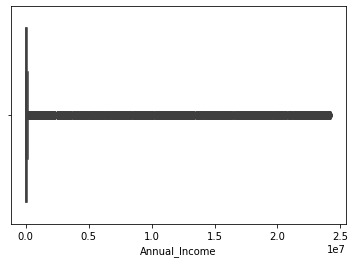

In [29]:
sns.boxplot(df['Annual_Income'])

#### Monthly_Inhand_Salary

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

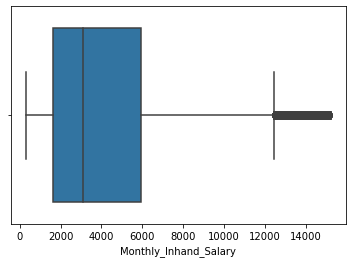

In [30]:
sns.boxplot(df['Monthly_Inhand_Salary'])

In [31]:
df['Monthly_Inhand_Salary'].unique()

array([ 1824.84333333,            nan,  3037.98666667, ...,
        8491.80866355,  4833.19305812, 10699.84985532])

In [32]:
df['Monthly_Inhand_Salary'].dtypes

dtype('float64')

In [33]:
## there is no changes in this feature

#### Num_Bank_Accounts

<AxesSubplot:xlabel='Num_Bank_Accounts'>

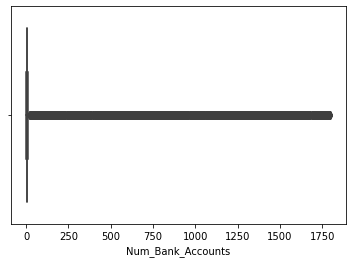

In [34]:
sns.boxplot(df['Num_Bank_Accounts'])

In [35]:
df['Num_Bank_Accounts'].value_counts()

6       19505
7       19231
8       19152
4       18286
5       18186
        ...  
1731        1
84          1
1458        1
1448        1
278         1
Name: Num_Bank_Accounts, Length: 1183, dtype: int64

In [36]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1, ..., 1554,  187,  278], dtype=int64)

In [37]:
df['Num_Bank_Accounts'].dtypes

dtype('int64')

In [38]:
x = dict(df.groupby('Customer_ID').median()['Num_Bank_Accounts'])

In [39]:
df['Num_Bank_Accounts'] = df['Customer_ID'].map(x)
## Here we have replaced the no. of bank accounts wrt customer id

In [40]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x : round(x))

In [41]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x : 0 if x<0 else x)

In [42]:
df['Num_Bank_Accounts'].value_counts()

6     19824
8     19476
7     19416
4     18552
5     18432
3     18072
9      8208
10     8004
1      6804
0      6612
2      6576
11       24
Name: Num_Bank_Accounts, dtype: int64

#### Num_Credit_Card

<AxesSubplot:xlabel='Num_Credit_Card'>

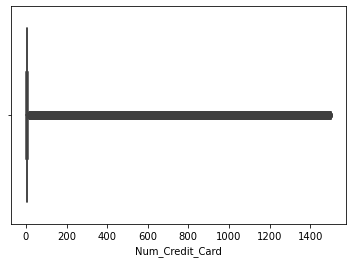

In [43]:
sns.boxplot(df['Num_Credit_Card'])

In [44]:
df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,   94,  934, 1209], dtype=int64)

In [45]:
df['Num_Credit_Card'].value_counts()

5       27669
7       24886
6       24802
4       21102
3       19816
        ...  
960         1
1331        1
1224        1
850         1
1209        1
Name: Num_Credit_Card, Length: 1344, dtype: int64

In [46]:
x = dict(df.groupby('Customer_ID').median()['Num_Credit_Card'])

In [47]:
df['Num_Credit_Card'] = df['Customer_ID'].map(x)
## Here we replaced the no of credit cards with respect to its customer id.

In [48]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: round(x))

In [49]:
df['Num_Credit_Card'].value_counts()

5     28260
6     25512
7     25404
4     21612
3     20244
8      7680
10     7476
9      7080
2      3360
1      3252
11       72
0        48
Name: Num_Credit_Card, dtype: int64

#### Interest_Rate

<AxesSubplot:xlabel='Interest_Rate'>

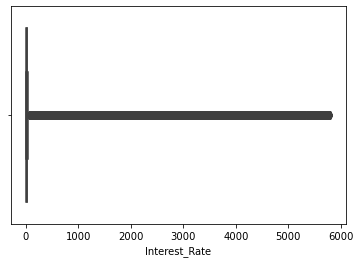

In [50]:
sns.boxplot(df['Interest_Rate'])

In [51]:
df['Interest_Rate'].value_counts().sort_index().head(50)

1     4027
2     3710
3     4153
4     3876
5     7479
6     7089
7     6744
8     7515
9     6747
10    6799
11    6626
12    6828
13    3571
14    3351
15    5984
16    5597
17    5719
18    6154
19    5440
20    5890
21    2335
22    2580
23    2530
24    2533
25    2356
26    2238
27    2416
28    2431
29    2495
30    2536
31    2188
32    2616
33    2201
34    2246
59       2
60       1
64       1
67       1
73       1
74       1
75       2
76       2
77       1
81       1
87       1
88       1
89       2
91       1
92       1
94       1
Name: Interest_Rate, dtype: int64

<AxesSubplot:xlabel='Interest_Rate'>

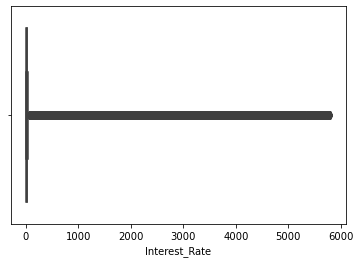

In [52]:
sns.boxplot(df['Interest_Rate'])

In [53]:
x = df.groupby('Customer_ID').median()['Interest_Rate']

In [54]:
df['Interest_Rate'] = df['Customer_ID'].map(x)

In [55]:
df['Interest_Rate'].value_counts()

8.0     7656
5.0     7644
6.0     7248
12.0    6972
10.0    6924
7.0     6876
9.0     6864
11.0    6768
18.0    6288
15.0    6108
20.0    6012
17.0    5832
16.0    5700
19.0    5556
3.0     4236
1.0     4116
4.0     3960
2.0     3780
13.0    3648
14.0    3408
32.0    2664
22.0    2628
24.0    2604
30.0    2592
23.0    2580
29.0    2544
28.0    2472
27.0    2460
25.0    2412
21.0    2388
34.0    2292
26.0    2292
33.0    2244
31.0    2232
Name: Interest_Rate, dtype: int64

#### Num_of_Loan

In [56]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x : int(x.strip('_')))

In [57]:
x = dict(df.groupby('Customer_ID').median()['Num_of_Loan'])

In [58]:
df['Num_of_Loan'] = df['Customer_ID'].map(x)

<AxesSubplot:xlabel='Num_of_Loan'>

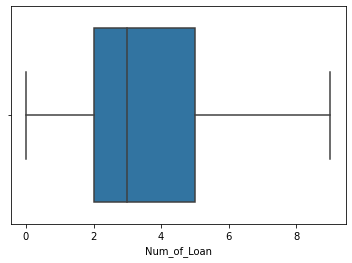

In [59]:
sns.boxplot(df['Num_of_Loan'])

In [60]:
## For each customer we have provided the number of loans taking in mind that their means

In [61]:
df['Num_of_Loan'].value_counts()

3.0    23628
2.0    23568
4.0    23184
0.0    17112
1.0    16692
6.0    12216
7.0    11520
5.0    11292
9.0     5784
8.0     5004
Name: Num_of_Loan, dtype: int64

#### Type_of_Loan

In [62]:
df['Num_of_Loan'] = df['Type_of_Loan'].apply(lambda x : x.split(',') if isinstance(x,str) else x).apply(lambda x : len(x) if isinstance(x,list) else x)

In [63]:
## Type of loan will only bring multicollinearity and we already have column that tells no. of loans that a customer have
## thus we will delete this column.

In [64]:
df.drop(columns =['Type_of_Loan'],inplace = True)

#### Delay_from_due_date

In [65]:
df.Delay_from_due_date.dtypes

dtype('int64')

In [66]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

<AxesSubplot:xlabel='Delay_from_due_date'>

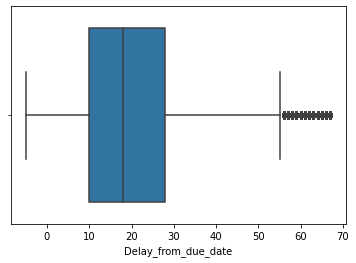

In [67]:
sns.boxplot(df['Delay_from_due_date'])

In [68]:
## The negetive values in this attribute indicates that the loan amount is paid that many days before the due data.

#### Num_of_Delayed_Payment

In [69]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', ..., '533', '332', '2034'], dtype=object)

In [70]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x : x.strip('_') if isinstance(x,str) else x)

In [71]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [72]:
x = df.groupby('Customer_ID').median()['Num_of_Delayed_Payment']

In [73]:
df['Num_of_Delayed_Payment'] = df['Customer_ID'].map(x)

In [74]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].apply(lambda x : round(x))

 Here we have corrected the num of delayed payment which show the no. of time a person defaulted their payment from there 
 actual due date.

#### Changed_Credit_Limit

In [75]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '35.53', '-4.6', '29.17'], dtype=object)

This column represent the change in the credit limit of a customer in percentage .

In [76]:
df['Changed_Credit_Limit'].value_counts().sort_index()

-0.009999999999999787       5
-0.01999999999999957        3
-0.020000000000000014       3
-0.029999999999999805       3
-0.030000000000000027       1
                         ... 
9.97                      137
9.98                       91
9.989999999999998           2
9.99                      125
_                        3150
Name: Changed_Credit_Limit, Length: 4605, dtype: int64

Here negetive values represents that customer has opted for less credit limit than the last time

In [77]:
df['Changed_Credit_Limit'].describe()
## Right now the column is object type which is wrongly typed since it must be of float type.

count     150000
unique      4605
top            _
freq        3150
Name: Changed_Credit_Limit, dtype: object

`'_' shows that there is no change in the credit limit of a customer , thus we can replace it with zero` 

In [78]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x : 0 if x == '_' else float(x))

In [79]:
df['Changed_Credit_Limit'].describe()

count    150000.000000
mean         10.166229
std           6.877983
min          -6.490000
25%           4.970000
50%           9.250000
75%          14.640000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

`-> This represent that maximum change in the customer's credit limit is +36% i.e increase in the credit limit of customer 
is around 36% from their past credit limit`

`-> where there are few people who have also opted for decrease in their credit limit and the max of decrease in the credit limit of a customer is 6%.`

#### Num_Credit_Inquiries

In [80]:
df['Num_Credit_Inquiries'].dtypes

dtype('float64')

In [81]:
df['Num_Credit_Inquiries'].describe()

count    147000.000000
mean         28.529014
std         194.456058
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

The data type of the column is float which consists of no of enquiries that a person did regarding credit card 

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

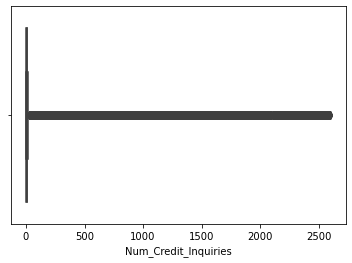

In [82]:
sns.boxplot(df['Num_Credit_Inquiries'])

`There are so many outliers present in the data set , 75% of the data is below 9 enquires which is quite acceptable thus let's do the needfull so as to get the right values for this attribute`

In [83]:
x = df.groupby('Customer_ID').median()['Num_Credit_Inquiries']

`Replacing the No. of credit card inquiries with repect to the customer id i.e one customer id will have same number of inquiries since it is done by that id only, thus values should be in corresponding to the customer id`

In [84]:
df['Num_Credit_Inquiries'] = df['Customer_ID'].map(x)

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

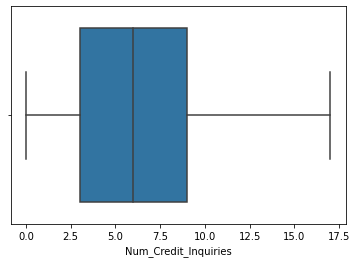

In [85]:
sns.boxplot(df['Num_Credit_Inquiries'])

`By treating the values in the data set outliers are also removed which is clearly seen in the boxplot above`

#### Credit_Mix &&&&&&&&

In [86]:
df['Credit_Mix'].dtype

dtype('O')

The datatype of the attribute is object

In [87]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [88]:
# It consists of the 

In [89]:
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

#### Outstanding_Debt

In [90]:
df['Outstanding_Debt'].dtypes

dtype('O')

`Type of the attribute is object` and 
this represents the remaining debt to be paid(in USD).

In [91]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '559.18_', '3711.23_',
       '732.11_'], dtype=object)

In [92]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x : float(x.strip('_')))

In [93]:
df['Outstanding_Debt'].describe()

count    150000.000000
mean       1426.220376
std        1155.127101
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

`The minimum debt that a customer have on them ranges from 0 to 4998, atleast avg debt on each person is 1426.22.`

<AxesSubplot:xlabel='Outstanding_Debt'>

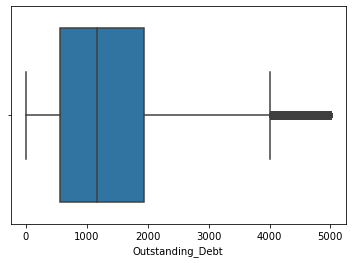

In [94]:
sns.boxplot(df['Outstanding_Debt'])

`There are few outliers present in the dataset i.e where are few customer which have large amount of debt on them i.e more than 4000`

#### Credit_Utilization_Ratio

In [95]:
df['Credit_Utilization_Ratio'].dtypes

dtype('float64')

`This represents the utilization ratio of credit cards.`

In [96]:
df['Credit_Utilization_Ratio'].describe()

count    150000.000000
mean         32.283309
std           5.113315
min          20.000000
25%          28.054731
50%          32.297058
75%          36.487954
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

`Your credit utilization rate, sometimes called your credit utilization ratio, is the amount of revolving credit you're currently using divided by the total amount of revolving credit you have available. In other words, it's how much you currently owe divided by your credit limit. It is generally expressed as a percent. It is said that lower the ratio percent better it is for customer`

#### Credit_History_Age    &&&&&&&&&

In [97]:
df['Credit_History_Age'].dtypes

dtype('O')

`Type of this column is object and this represents the age of the credit history of the person.`

In [98]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [99]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x : x.replace('Years and','').replace('Months','').replace('  ','.') if isinstance(x,str) else x)

In [100]:
df['Credit_History_Age'].apply(lambda x : x.index('.') if isinstance(x,str) else x).unique()

array([ 2., nan,  1.])

In [101]:
def x(a):
    if isinstance(a,str):
        if a.index('.') == 1:
            return int(a[:1])+(int(a[2:])/12)
        if a.index('.') == 2:
            return int(a[:2]) + (int(a[3:])/12)
    else:
        a

In [102]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(x)

`Here we have converted the years and months from text to years in decimal form.`

In [103]:
df['Credit_History_Age'].dtypes

dtype('float64')

In [104]:
df['Credit_History_Age'].describe()

count    136500.000000
mean         18.601277
std           8.309962
min           0.083333
25%          12.166667
50%          18.500000
75%          25.333333
max          34.000000
Name: Credit_History_Age, dtype: float64

`Maximum years from which the customer owns a credit card is 34 and least years is 0.08 years. The mean value of the data shows that on an average a customer owns a credit card from around 18 years`

#### Payment_of_Min_Amount

In [105]:
df['Payment_of_Min_Amount'].dtypes

dtype('O')

`Datatype of the attribute is object and it consists whether only the minimum amount was
paid by the person.`

In [106]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [107]:
df['Payment_of_Min_Amount'].describe()

count     150000
unique         3
top          Yes
freq       78484
Name: Payment_of_Min_Amount, dtype: object

- Here the three category says:

No: No the customer has not just paid the min amount.

Yes : Yes the customer has paid the min amount only.

NM : It is not Not Mentioned that weather the customer has only paid the min amount or not.

In [108]:
df['Payment_of_Min_Amount'].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

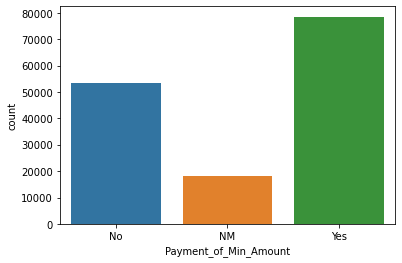

In [109]:
sns.countplot(df['Payment_of_Min_Amount']);

#### Total_EMI_per_month

In [110]:
df['Total_EMI_per_month'].dtypes

dtype('float64')

In [111]:
df['Total_EMI_per_month'].describe()

count    150000.000000
mean       1432.513579
std        8403.759977
min           0.000000
25%          30.947775
50%          71.280006
75%         166.279555
max       82398.000000
Name: Total_EMI_per_month, dtype: float64

<AxesSubplot:xlabel='Total_EMI_per_month'>

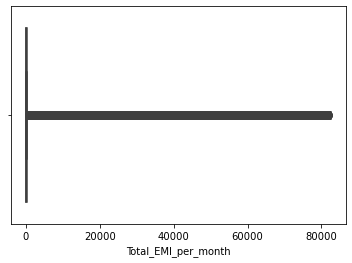

In [112]:
sns.boxplot(df['Total_EMI_per_month'])

`Represents the monthly EMI payments(in USD).`

#### Amount_invested_monthly

In [113]:
df['Amount_invested_monthly'].dtypes

dtype('O')

`The datatype of this attribute is object and this represents the monthly amount invested by the
customer(in USD)`

In [114]:
df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '181.44299902757518', '97.59857973344877', '220.45787812168732'],
      dtype=object)

`There are few values like this '__10000__' which needs to be treated`

In [115]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x : float(x.strip('__')) if isinstance(x,str) else x)

In [116]:
df['Amount_invested_monthly'].dtypes

dtype('float64')

<AxesSubplot:xlabel='Amount_invested_monthly'>

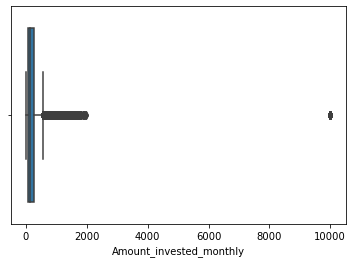

In [117]:
sns.boxplot(df['Amount_invested_monthly'])

In [118]:
df['Amount_invested_monthly'].describe()

count    143250.000000
mean        638.826309
std        2046.843019
min           0.000000
25%          74.533842
50%         135.791445
75%         266.110841
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

The max amount invested by customer is 10000 USD and the minimum amount is 0 i.e there few people who do not want to invest.

-> On an avg 638 USD is being invested by each customer.

#### Payment_Behaviour

In [119]:
df['Payment_Behaviour'].dtypes

dtype('O')

`The datatype of this feature is object and this represents the payment behavior of the customer (in
USD)`

In [120]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [121]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

`Treating the anomaly with mode of the data.`

In [122]:
df['Payment_Behaviour'].mode()[0]

'Low_spent_Small_value_payments'

In [123]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x : df['Payment_Behaviour'].mode()[0] if x == '!@9#%8' else x)

In [124]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

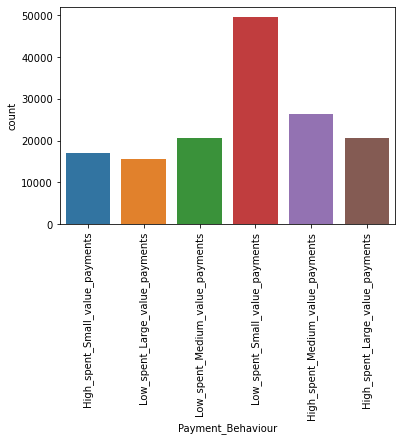

In [125]:
sns.countplot(df['Payment_Behaviour'])
plt.xticks(rotation=90);

`Here is a count plot of all the catrgories in the attribute, which shows that there are more than 40000 people with low_spent_small_value_payment.`

#### Monthly_Balance

In [126]:
df['Monthly_Balance'].dtypes

dtype('O')

`Datatype of this attribute is object and this represents the monthly amount of the customer (in USD)`

In [127]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '349.7263321025098', '463.23898098947717',
       '360.37968260123847'], dtype=object)

`__-333333333333333333333333333__` this type of values need to be treated first

In [128]:
df['Monthly_Balance'].isna().sum()

1762

In [129]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(lambda x : np.NaN if x == '__-333333333333333333333333333__' else float(x))

In [130]:
df['Monthly_Balance'].describe()

count    148223.000000
mean        402.723009
std         213.844776
min           0.007760
25%         270.241882
50%         336.815865
75%         470.477895
max        1606.518192
Name: Monthly_Balance, dtype: float64

-> The max Balance present in a customer's account is 1606 and the least is close to 0 i.e 0.0077

-> On an avg there are 402 USD in the a person's bank account.

-> The Median of the data is 336.81 USD

Till now we have corrected all the datatypes of each of the attributes and also removed the anomalies present in the dataset moving on too the next step i.e `NULL VALUE ANALYSIS`.

In [131]:
df_num = df.select_dtypes(include=np.number)
## DATA FRAME FOR NUMERICAL COLUMNS.

In [132]:
df_cat = df.select_dtypes(include=object)
## DATA FRAME FOR CATEGORICAL COLUMNS.

# Null Value Analysis

In [133]:
df.isnull().sum()
## This show the no. of null values present in each features.

Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                 17112
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1777
dtype: int64

In [134]:
## Percentage of null values present in each features.
df.isnull().sum()/df.shape[0]*100

Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          5.600000
Occupation                   7.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                 11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       0.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         0.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Balance              1.184667
dtype: float64

In [135]:
## Percent of Null values greater 0.
(df.isnull().sum()/df.shape[0]*100)[df.isnull().sum()/df.shape[0]*100 >0].to_frame()

,0
Name,10.000000
SSN,5.600000
Occupation,7.000000
Monthly_Inhand_Salary,15.000000
Num_of_Loan,11.408000
Credit_History_Age,9.000000
Amount_invested_monthly,4.500000
Monthly_Balance,1.184667


`Name,Ssn,Occupation,Monthlyinhandsalary,numofloan,credithistoryage,amountinvestedmonthly,monthlybalance are the few attributes with null values present in them, even though later on in feature seletion we will remove name and ssn , so let's remove it now only.`

In [136]:
df.drop(columns=['Name','SSN'],inplace=True)

In [137]:
## Percent of Null values greater 0.
(df.isnull().sum()/df.shape[0]*100)[df.isnull().sum()/df.shape[0]*100 >0].to_frame()

,0
Occupation,7.000000
Monthly_Inhand_Salary,15.000000
Num_of_Loan,11.408000
Credit_History_Age,9.000000
Amount_invested_monthly,4.500000
Monthly_Balance,1.184667


<AxesSubplot:ylabel='ID'>

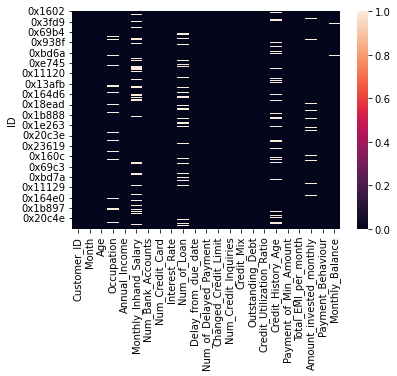

In [138]:
sns.heatmap(df.isnull())

#### Occupation

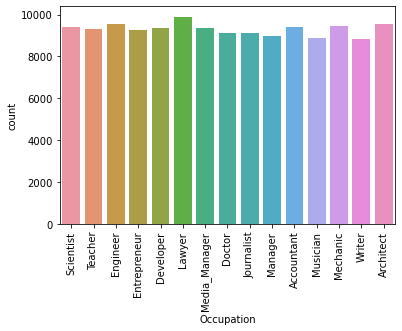

In [139]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=90);

`Let's check the dependancy of this columns with repect to other categorical columns , to do that we will use Chi2 test for independence.`

`Droping the null values of this column since if we will fill it with mode of the data then we will make one category dominent but since we are told not to delete any of the rows thus we will not delete it rather replace null by mode of the feature.`

In [140]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace = True)

#### Monthly_Inhand_Salary

In [141]:
df['Monthly_Inhand_Salary'].isnull().sum()

22500

1.1286313664969128

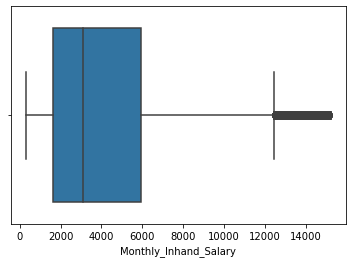

In [142]:
sns.boxplot(df['Monthly_Inhand_Salary'])
df['Monthly_Inhand_Salary'].skew()

`let's see how this column behaves with other categorical columns`

In [143]:
df.select_dtypes(include=object)

,Customer_ID,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
ID,,,,,,
0x1602,CUS_0xd40,January,Scientist,_,No,High_spent_Small_value_payments
0x1603,CUS_0xd40,February,Scientist,Good,No,Low_spent_Large_value_payments
0x1604,CUS_0xd40,March,Scientist,Good,No,Low_spent_Medium_value_payments
0x1605,CUS_0xd40,April,Scientist,Good,No,Low_spent_Small_value_payments
0x1606,CUS_0xd40,May,Scientist,Good,No,High_spent_Medium_value_payments
...,...,...,...,...,...,...
0x25fe5,CUS_0x8600,December,Architect,_,Yes,Low_spent_Small_value_payments
0x25fee,CUS_0x942c,September,Mechanic,Good,NM,Low_spent_Small_value_payments
0x25fef,CUS_0x942c,October,Mechanic,Good,No,Low_spent_Large_value_payments


`customer_id will only complicate things for us so let's delete this feature and also credit_mix is type of variable which we are trying to predict so delete this column too.`

In [144]:
df.drop(columns =['Customer_ID','Credit_Mix'],inplace = True)

In [145]:
df.select_dtypes(include=object)

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour
ID,,,,
0x1602,January,Scientist,No,High_spent_Small_value_payments
0x1603,February,Scientist,No,Low_spent_Large_value_payments
0x1604,March,Scientist,No,Low_spent_Medium_value_payments
0x1605,April,Scientist,No,Low_spent_Small_value_payments
0x1606,May,Scientist,No,High_spent_Medium_value_payments
...,...,...,...,...
0x25fe5,December,Architect,Yes,Low_spent_Small_value_payments
0x25fee,September,Mechanic,NM,Low_spent_Small_value_payments
0x25fef,October,Mechanic,No,Low_spent_Large_value_payments


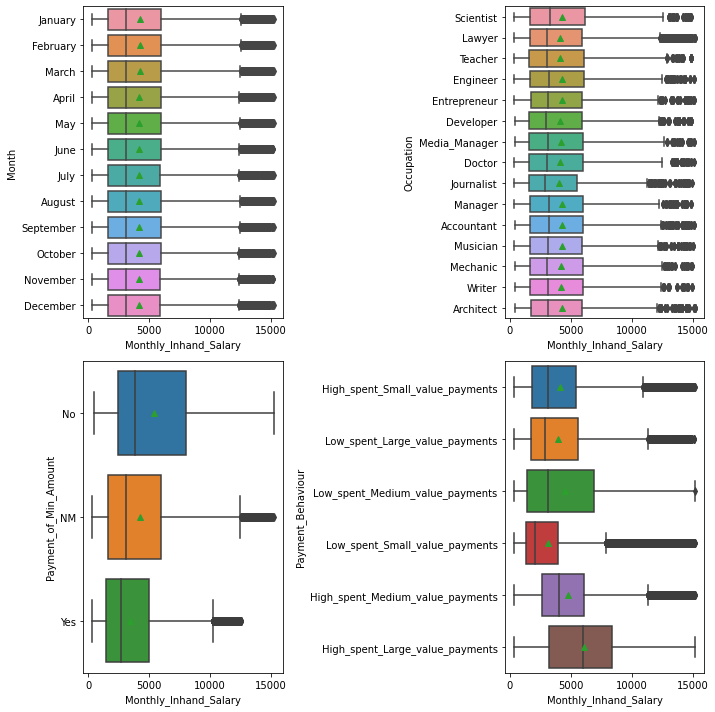

In [146]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for i , j in zip(df.select_dtypes(include=object).columns , ax.flatten()):
    sns.boxplot(y=df[i],x = df['Monthly_Inhand_Salary'] , ax = j,showmeans = True)
plt.tight_layout()

`As seen from the plot for each category the means remains the same as before and same goes with the median of the data thus treating the null values with the median of the data will be good.`

In [147]:
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(),inplace = True)

In [148]:
df['Monthly_Inhand_Salary'].isnull().sum()
## Treated Null values.

0

<AxesSubplot:>

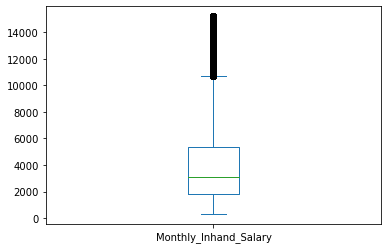

In [149]:
df['Monthly_Inhand_Salary'].plot(kind='box')

#### Num_of_Loan

In [150]:
df['Num_of_Loan'].isnull().sum()

17112

In [151]:
df['Num_of_Loan'].isnull().sum()/df.shape[0]*100

11.408

`Before filling the null values we must see that how the data is distributed in this feature.`

<AxesSubplot:xlabel='Num_of_Loan'>

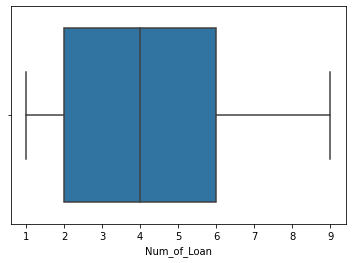

In [152]:
sns.boxplot(df['Num_of_Loan'])

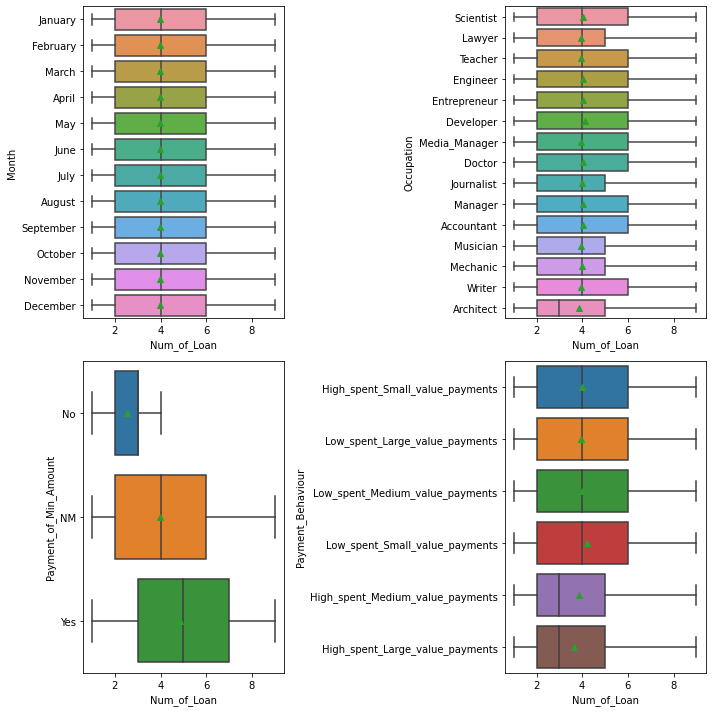

In [153]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for i , j in zip(df.select_dtypes(include=object).columns , ax.flatten()):
    sns.boxplot(y=df[i],x = df['Num_of_Loan'] , ax = j,showmeans = True)
plt.tight_layout()

In [154]:
df['Num_of_Loan'].fillna(round(df['Num_of_Loan'].mean()),inplace = True)

In [155]:
df['Num_of_Loan'].isnull().sum()

0

<AxesSubplot:xlabel='Num_of_Loan'>

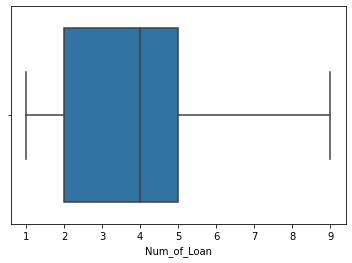

In [156]:
sns.boxplot(df['Num_of_Loan'])

#### Credit_History_Age

In [157]:
df['Credit_History_Age'].isnull().sum()

13500

In [158]:
df['Credit_History_Age'].isnull().sum()/df.shape[0]*100

9.0

-0.04802395316260926

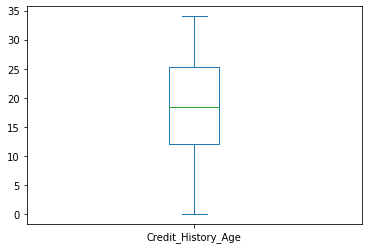

In [159]:
df['Credit_History_Age'].plot(kind = 'box');
df['Credit_History_Age'].skew()

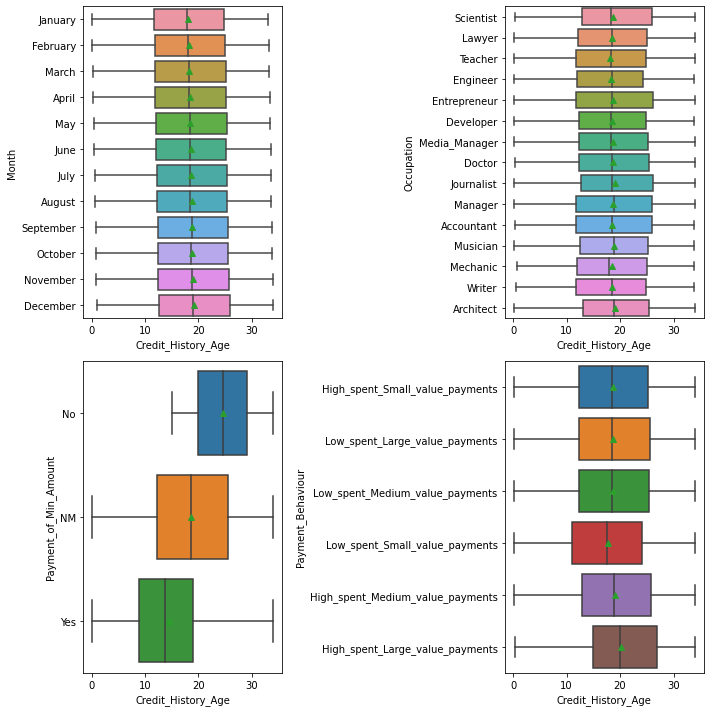

In [160]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for i , j in zip(df.select_dtypes(include=object).columns , ax.flatten()):
    sns.boxplot(y=df[i],x = df['Credit_History_Age'] , ax = j,showmeans = True)
plt.tight_layout()

`The data is nearly normal thus we can treat the null values with mean of the data.`

In [161]:
df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean(),inplace=True)

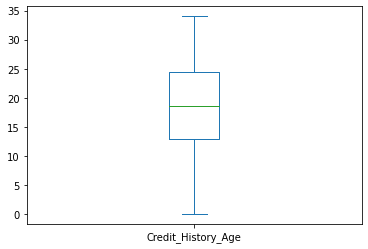

In [162]:
df['Credit_History_Age'].plot(kind = 'box');

In [163]:
df['Credit_History_Age'].isnull().sum()

0

#### Amount_invested_monthly

In [164]:
df['Amount_invested_monthly'].isnull().sum()

6750

In [165]:
df['Amount_invested_monthly'].isnull().sum()/df.shape[0]*100

4.5

<AxesSubplot:xlabel='Amount_invested_monthly'>

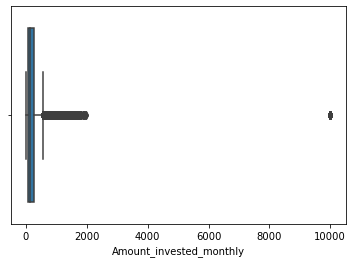

In [166]:
sns.boxplot(df['Amount_invested_monthly'])

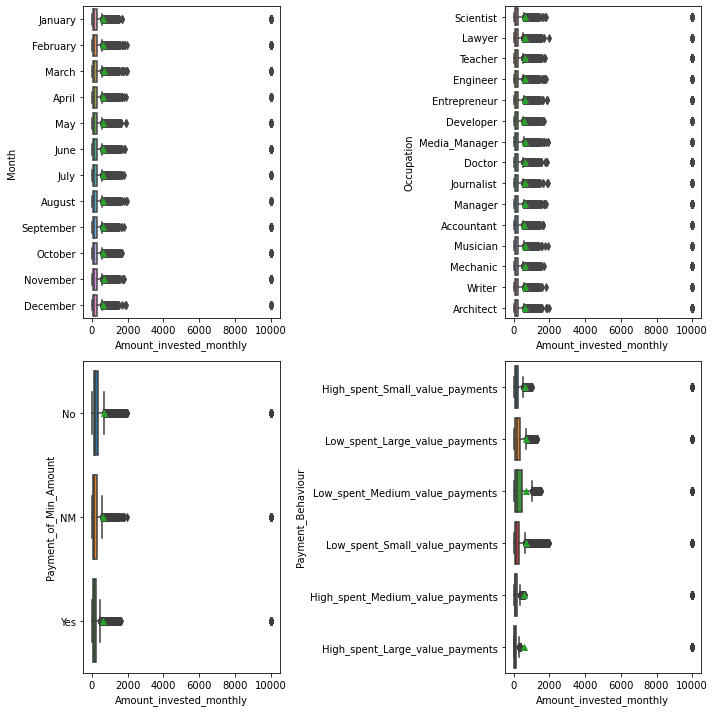

In [167]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for i , j in zip(df.select_dtypes(include=object).columns , ax.flatten()):
    sns.boxplot(y=df[i],x = df['Amount_invested_monthly'] , ax = j,showmeans = True)
plt.tight_layout()

`Since there are so many outliers present in the data set thus replacing null values with median of the data will be good.`

In [168]:
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(),inplace=True)

<AxesSubplot:>

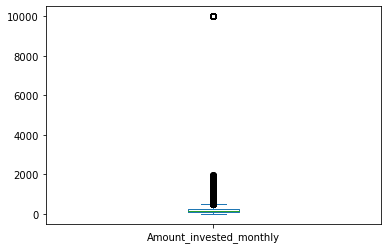

In [169]:
df['Amount_invested_monthly'].plot(kind='box')

In [170]:
df['Amount_invested_monthly'].isnull().sum()

0

#### Monthly_Balance

In [171]:
df['Monthly_Balance'].isnull().sum()

1777

In [172]:
df['Monthly_Balance'].isnull().sum()/df.shape[0]*100

1.1846666666666668

`let's see the distribution of the data`

1.5905121038295311

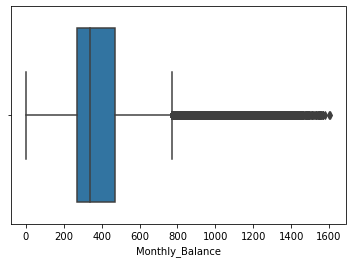

In [173]:
sns.boxplot(df['Monthly_Balance'])
df['Monthly_Balance'].skew()

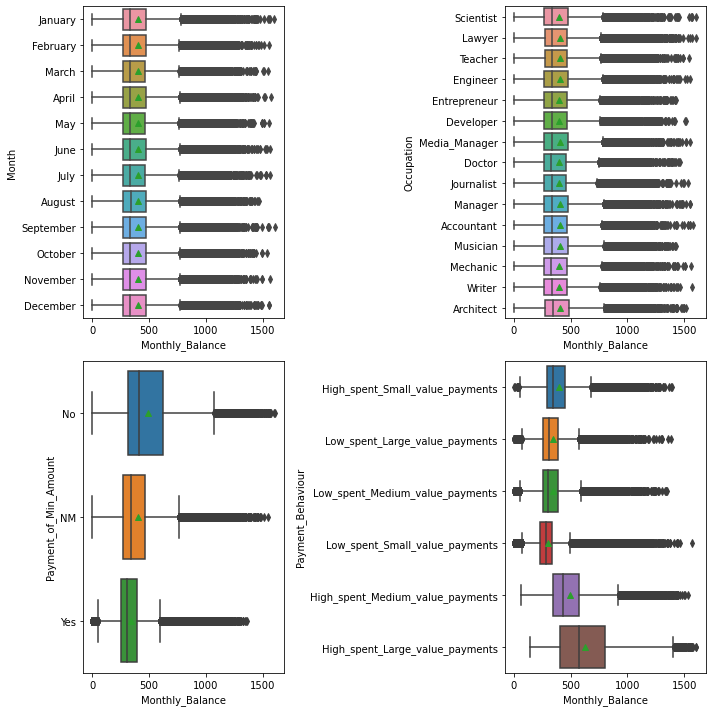

In [174]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for i , j in zip(df.select_dtypes(include=object).columns , ax.flatten()):
    sns.boxplot(y=df[i],x = df['Monthly_Balance'] , ax = j,showmeans = True)
plt.tight_layout()

`Since there are too many outliers present in the data set thus we will replace the null values with the median of the data`

In [175]:
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(),inplace = True)

<AxesSubplot:>

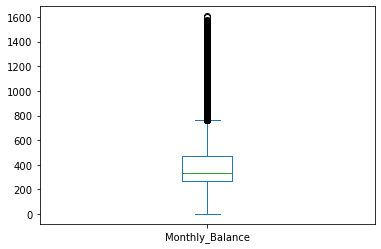

In [176]:
df['Monthly_Balance'].plot(kind = 'box')

In [177]:
df['Monthly_Balance'].isnull().sum()

0

In [178]:
df.isnull().sum().to_frame()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


`We are done with the null values analysis and their treatment now moving forward with the outlier treatment of the data.`

## Outlier Treatment 

In [179]:
df.select_dtypes(include=np.number)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,,,,,,,,,,,,,,,,,
0x1602,23.0,19114.12,1824.843333,3,4,3.0,4.0,3,6,11.27,4.0,809.98,26.822620,22.083333,49.574949,80.415295,312.494089
0x1603,23.0,19114.12,3091.000000,3,4,3.0,4.0,-1,6,11.27,4.0,809.98,31.944960,18.601277,49.574949,118.280222,284.629162
0x1604,43.0,19114.12,3091.000000,3,4,3.0,4.0,3,6,0.00,4.0,809.98,28.609352,22.250000,49.574949,81.699521,331.209863
0x1605,23.0,19114.12,3091.000000,3,4,3.0,4.0,5,6,6.27,4.0,809.98,31.377862,22.333333,49.574949,199.458074,223.451310
0x1606,23.0,19114.12,1824.843333,3,4,3.0,4.0,6,6,11.27,4.0,809.98,24.797347,22.416667,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe5,43.0,20002.88,1929.906667,10,8,29.0,5.0,33,25,18.31,9.0,3571.70,34.780553,18.601277,60.964772,146.486325,275.539570
0x25fee,25.0,39628.99,3091.000000,4,6,7.0,2.0,20,6,11.50,3.0,502.38,27.758522,31.916667,35.104023,181.442999,409.394562
0x25fef,25.0,39628.99,3359.415833,4,6,7.0,2.0,23,6,13.50,3.0,502.38,36.858542,32.000000,35.104023,10000.000000,349.726332


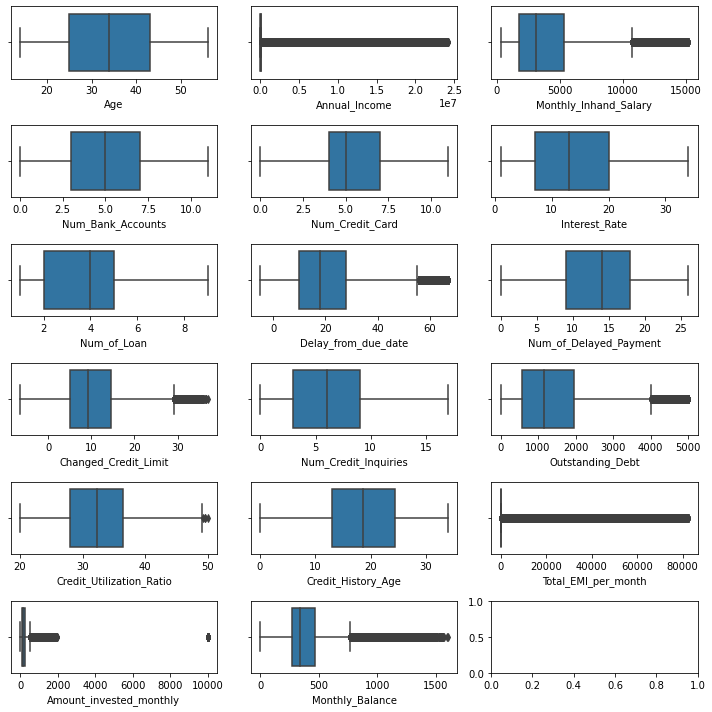

In [180]:
fig,ax = plt.subplots(6,3,figsize=(10,10))
for i,j in zip(df.select_dtypes(exclude=object),ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.tight_layout()

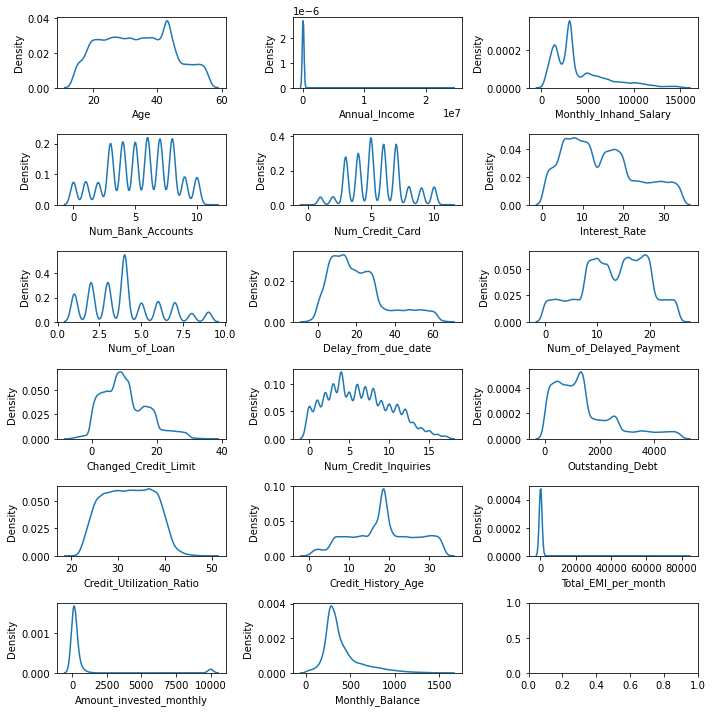

In [181]:
fig,ax = plt.subplots(6,3,figsize=(10,10))
for i,j in zip(df.select_dtypes(exclude=object),ax.flatten()):
    sns.kdeplot(df[i],ax=j)
plt.tight_layout()

In [182]:
skew = df.skew()[df.skew()>1]
skew

Annual_Income              12.763361
Monthly_Inhand_Salary       1.351665
Outstanding_Debt            1.207530
Total_EMI_per_month         7.049776
Amount_invested_monthly     4.429771
Monthly_Balance             1.607981
dtype: float64

`We will transform all the numerical column with skewness greater than 1 so as to reduce the impact the outliers on the model.`

#### Annual_Income

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

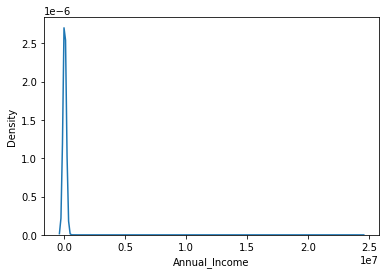

In [183]:
sns.kdeplot(df['Annual_Income'])

In [184]:
skew.head(1)

Annual_Income    12.763361
dtype: float64

`Since the skewness is really high for this attribute thus we will do log transformations`

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

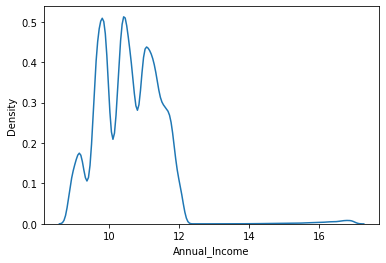

In [185]:
sns.kdeplot(np.log(df['Annual_Income']))
## The skewness came down to 1.8 from 12.7 thus let's do it. even if there will be few outliers present but the impact will
## be really less in comparision to previous values.

In [186]:
trans_data = df.copy()
trans_data['Annual_Income'] = np.log(trans_data['Annual_Income'])

#### Monthly_Inhand_Salary

In [187]:
skew['Monthly_Inhand_Salary']

1.3516651410363179

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

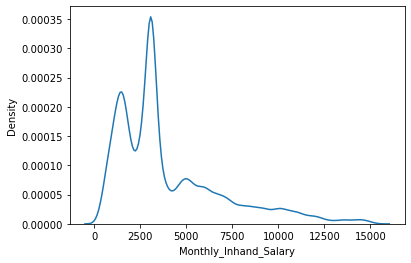

In [188]:
sns.kdeplot(df['Monthly_Inhand_Salary'])

`the skewness is a little this thus we will do sqrt tranform`

In [189]:
trans_data['Monthly_Inhand_Salary'] = np.sqrt(trans_data['Monthly_Inhand_Salary']) 

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

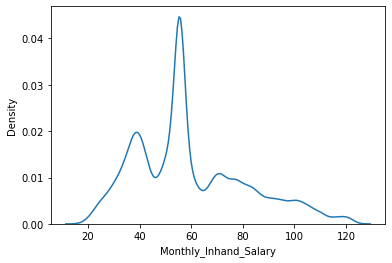

In [190]:
sns.kdeplot(trans_data['Monthly_Inhand_Salary'])

`The distribution of the data look nearly normal.`

#### Outstanding_Debt

In [191]:
skew['Outstanding_Debt']

1.207530157786684

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Density'>

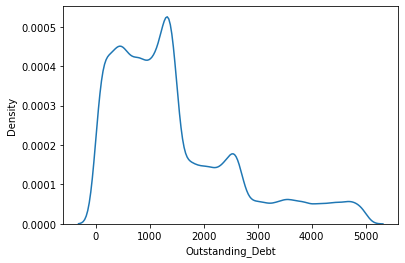

In [192]:
sns.kdeplot(df['Outstanding_Debt'])

`The skewness of the feature is close to one so we will go for sqrt transform.`

In [193]:
trans_data['Outstanding_Debt'] = np.sqrt(trans_data['Outstanding_Debt'])

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Density'>

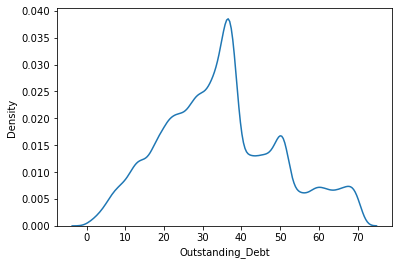

In [194]:
sns.kdeplot(trans_data['Outstanding_Debt'])

#### Total_EMI_per_month

In [195]:
skew['Total_EMI_per_month']

7.04977622485511

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

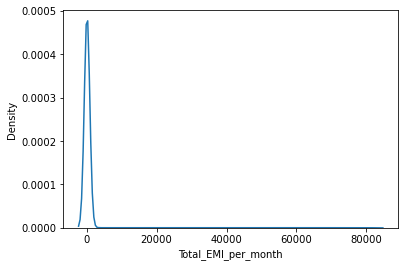

In [196]:
sns.kdeplot(df['Total_EMI_per_month'])

`Feature is highly skewed thus we will go for log tranformation`

In [197]:
trans_data['Total_EMI_per_month'] = stats.yeojohnson(df['Total_EMI_per_month'])[0]

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Density'>

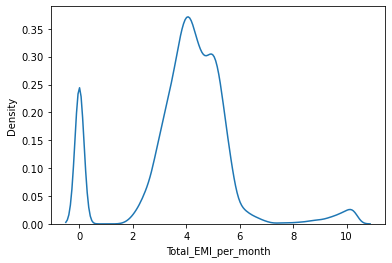

In [198]:
sns.kdeplot(trans_data['Total_EMI_per_month'])

`The skewness of the data is nearly normal now.`

#### Amount_invested_monthly

In [199]:
skew['Amount_invested_monthly']

4.429771000297515

<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Density'>

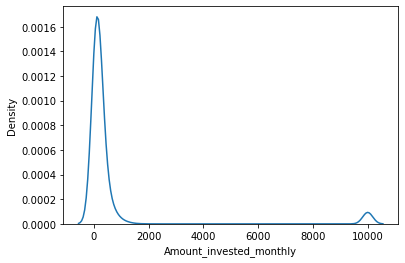

In [200]:
sns.kdeplot(df['Amount_invested_monthly'])

<AxesSubplot:xlabel='Amount_invested_monthly'>

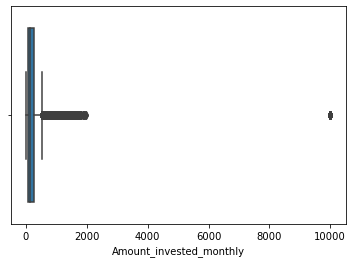

In [201]:
sns.boxplot(df['Amount_invested_monthly'])

In [202]:
df['Amount_invested_monthly'].value_counts().sort_index(ascending=False)

10000.000000    6480
1977.326102        1
1961.218850        1
1944.520747        1
1941.237454        1
                ... 
10.025344          1
10.011425          1
10.010194          1
10.004222          1
0.000000         275
Name: Amount_invested_monthly, Length: 136498, dtype: int64

`Caping the outer most outlier with the second most outlier value and then transforming the data`

In [203]:
trans_data['Amount_invested_monthly'] = trans_data['Amount_invested_monthly'].apply(lambda x : 1977.32 if x > 1978 else x)

In [204]:
trans_data['Amount_invested_monthly'].skew()

3.269598383629861

<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Density'>

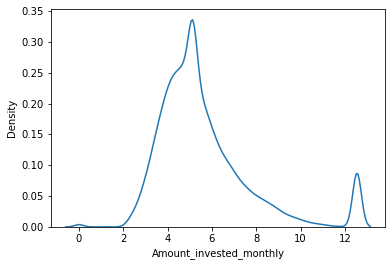

In [205]:
sns.kdeplot(np.cbrt(trans_data['Amount_invested_monthly']))

`The feature looks nearly normal now`

#### Monthly_Balance

In [206]:
skew['Monthly_Balance']

1.6079810825933205

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Density'>

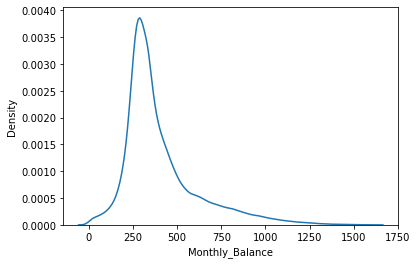

In [207]:
sns.kdeplot(df['Monthly_Balance'])

In [208]:
trans_data['Monthly_Balance'] = np.sqrt(trans_data['Monthly_Balance'])

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Density'>

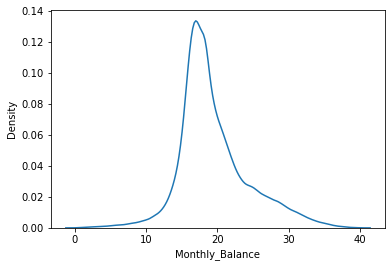

In [209]:
sns.kdeplot(trans_data['Monthly_Balance'])

`The feature is looks nearly normal.`

`We have treated all the outliers present in the data set also or atleast lower the the impact of the outliers.`

#### Target Variable Analysis

In [210]:
train['Credit_Score'].value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

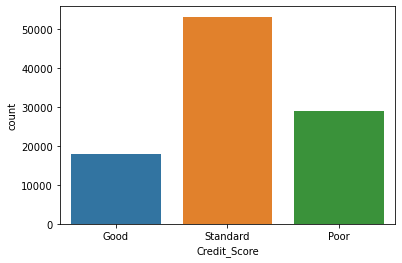

In [211]:
sns.countplot(train['Credit_Score']);

`There is not a single category which is not dominating, thus we can say that the data is not imbalanced.`

In [212]:
df_num = trans_data.select_dtypes(include=np.number)
df_cat = trans_data.select_dtypes(include=object)

## Encoding the data

In [213]:
trans_data.select_dtypes(include=object).describe()

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour
count,150000,150000,150000,150000
unique,12,15,3,6
top,January,Lawyer,Yes,Low_spent_Small_value_payments
freq,12500,20399,78484,49607


`We will do the label encoding of the columns Month, Occupation and payment_behaviour, and one-hot encoding of the Payment_of_min_Amount`

In [214]:
le = LabelEncoder()
trans_data['Month'] = le.fit_transform(trans_data['Month'])

In [215]:
trans_data['Occupation'] = le.fit_transform(trans_data['Occupation'])

In [216]:
trans_data['Payment_Behaviour'] = le.fit_transform(trans_data['Payment_Behaviour'])

In [217]:
trans_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,4,23.0,12,9.858183,42.718185,3,4,3.0,4.0,3,6,11.27,4.0,28.460148,26.822620,22.083333,No,3.805326,80.415295,2,17.677502
0x1603,3,23.0,12,9.858183,55.596762,3,4,3.0,4.0,-1,6,11.27,4.0,28.460148,31.944960,18.601277,No,3.805326,118.280222,3,16.870956
0x1604,7,43.0,12,9.858183,55.596762,3,4,3.0,4.0,3,6,0.00,4.0,28.460148,28.609352,22.250000,No,3.805326,81.699521,4,18.199172
0x1605,0,23.0,12,9.858183,55.596762,3,4,3.0,4.0,5,6,6.27,4.0,28.460148,31.377862,22.333333,No,3.805326,199.458074,5,14.948288
0x1606,8,23.0,12,9.858183,42.718185,3,4,3.0,4.0,6,6,11.27,4.0,28.460148,24.797347,22.416667,No,3.805326,41.420153,1,18.479427


In [218]:
trans_data = pd.get_dummies(trans_data,columns = ['Payment_of_Min_Amount'],drop_first=True)

## Scaling Of the data for Model Building

In [219]:
trans_data.shape

(150000, 22)

In [220]:
train_eda = trans_data.head(100000)
test_eda = trans_data.tail(50000)
print(train_eda.shape,test_eda.shape)

(100000, 22) (50000, 22)


`Again spliting the data into train and test again.`

In [221]:
sc = StandardScaler()
train_eda[df_num.columns] = sc.fit_transform(train_eda[df_num.columns])
test_eda[df_num.columns] = sc.transform(test_eda[df_num.columns])
## Scaling the numerical columns only.

In [222]:
train_eda.shape,test_eda.shape

((100000, 22), (50000, 22))

## Basic Decision Tree Model
###### Here we are not using basic Logit model since it is only used for binary classification and not for multi-class classification

In [223]:
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [224]:
maps = {'Good': 2, 'Standard': 1 , 'Poor': 0}
train['Credit_Score'] = train['Credit_Score'].map(maps)

In [225]:
## spliting the train data into train and test set for model building.
X = train_eda.reset_index(drop=True)
y = train['Credit_Score'].reset_index(drop=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(70000, 22) (30000, 22) (70000,) (30000,)


In [226]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train,y_train)

In [227]:
# tree.plot_tree(model_dt,class_names=['0','1','2'])
# plt.show()

In [228]:
train_pred_dt = model_dt.predict(X_train)
test_pred_dt = model_dt.predict(X_test)
train_prob_dt = model_dt.predict(X_train)
test_prob_dt = model_dt.predict_proba(X_test)

In [229]:
def class_rep(train_pred,test_pred):
    cor_mat = confusion_matrix(y_test,test_pred)
    sns.heatmap(cor_mat,annot=True,fmt = '.2f')
    plt.show()
    print('Classification Report of Test Set')
    print(classification_report(y_test,test_pred))
    print('Classification Report of Train Set')
    print(classification_report(y_train,train_pred))
    print('Cohen Kappa Score',cohen_kappa_score(y_test,test_pred))

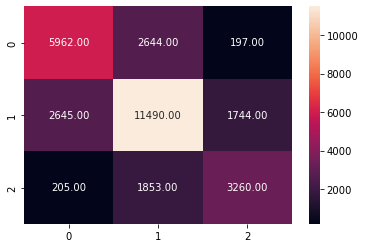

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      8803
           1       0.72      0.72      0.72     15879
           2       0.63      0.61      0.62      5318

    accuracy                           0.69     30000
   macro avg       0.67      0.67      0.67     30000
weighted avg       0.69      0.69      0.69     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20195
           1       1.00      1.00      1.00     37295
           2       1.00      1.00      1.00     12510

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

Cohen Kappa Score 0.48486949545623703


In [230]:
class_rep(train_pred_dt,test_pred_dt)

**INFERENCE**

`This model is highly overfitting model since train's accuracy is 1 and that of test is 0.69, let's try to prune the decision tree so as to get rid of over fitting in the model`

#### Pruned Decision Tree

In [231]:
dt1 = DecisionTreeClassifier()
params = {'criterion':['gini','entropy'],
    'max_depth': [2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10]}
gd_dt1 = GridSearchCV(estimator=dt1,param_grid=params)
model_dtp = gd_dt1.fit(X_train,y_train)
model_dtp.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

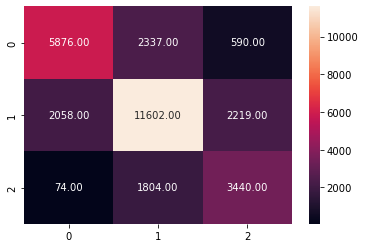

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      8803
           1       0.74      0.73      0.73     15879
           2       0.55      0.65      0.59      5318

    accuracy                           0.70     30000
   macro avg       0.67      0.68      0.68     30000
weighted avg       0.70      0.70      0.70     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     20195
           1       0.76      0.76      0.76     37295
           2       0.57      0.67      0.62     12510

    accuracy                           0.72     70000
   macro avg       0.70      0.71      0.70     70000
weighted avg       0.73      0.72      0.73     70000

Cohen Kappa Score 0.5012541839087434


In [232]:
## {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}
train_pred_dtp = model_dtp.predict(X_train)
test_pred_dtp = model_dtp.predict(X_test)
train_prob_dtp = model_dtp.predict(X_train)
test_prob_dtp = model_dtp.predict_proba(X_test)
class_rep(train_pred_dtp,test_pred_dtp)

**INFERENCE**

`This is a better model since the overfitting is eliminated and the accuracy of the model is 70%, the f1 score for class 1 is 0.70, that of class 2 is 0.73 and that of class 3 is 0.59 which is less than the other classes thus we need to work on other models so as to equalize the f1 score , and even the kappa score is just 0.5 thus there is substantial agreement between the actual and predicted values`

## Bagging Algorithm

#### Random Forest 

In [233]:
rf = RandomForestClassifier()
params = { 'n_estimators':[100,120,80],
    'criterion':['gini','entorpy'],
    'max_depth':[5,6,7],
    'min_samples_split':[2,4,6]}
gd_rf = GridSearchCV(estimator=rf , param_grid=params , cv = 5)
model_rf = gd_rf.fit(X_train,y_train)
model_rf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 120}

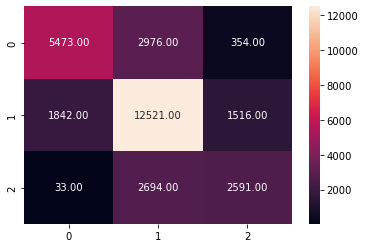

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      8803
           1       0.69      0.79      0.74     15879
           2       0.58      0.49      0.53      5318

    accuracy                           0.69     30000
   macro avg       0.67      0.63      0.65     30000
weighted avg       0.69      0.69      0.68     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.75      0.63      0.69     20195
           1       0.70      0.80      0.75     37295
           2       0.60      0.50      0.55     12510

    accuracy                           0.70     70000
   macro avg       0.68      0.64      0.66     70000
weighted avg       0.70      0.70      0.69     70000

Cohen Kappa Score 0.45967099570663883


In [234]:
train_pred_rf = model_rf.predict(X_train)
test_pred_rf = model_rf.predict(X_test)
train_prob_rf = model_rf.predict(X_train)
test_prob_rf = model_rf.predict_proba(X_test)
class_rep(train_pred_rf,test_pred_rf)

**INFERENCE**

The model's accuracy is 69% which is less than the previous model and hence this is not a good model and let's do the grid search so as to get better accuracy and also the kappa score is less than 0.5 thus can't rely on the actual and predicted values.

In [235]:
rf = RandomForestClassifier(n_estimators=140,criterion = 'gini',max_depth = 13)
model_rf2 = rf.fit(X_train,y_train)

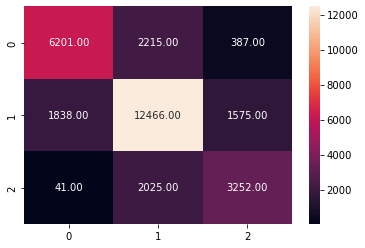

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      8803
           1       0.75      0.79      0.77     15879
           2       0.62      0.61      0.62      5318

    accuracy                           0.73     30000
   macro avg       0.71      0.70      0.71     30000
weighted avg       0.73      0.73      0.73     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     20195
           1       0.80      0.84      0.82     37295
           2       0.71      0.69      0.70     12510

    accuracy                           0.79     70000
   macro avg       0.78      0.76      0.77     70000
weighted avg       0.79      0.79      0.79     70000

Cohen Kappa Score 0.5475947677926902


In [236]:
train_pred_rf2 = model_rf2.predict(X_train)
test_pred_rf2 = model_rf2.predict(X_test)
train_prob_rf2 = model_rf2.predict(X_train)
test_prob_rf2 = model_rf2.predict_proba(X_test)
class_rep(train_pred_rf2,test_pred_rf2)

**INFERENCE**

The Model's accuracy is 73% for the unknown data and hence this is a good model with kappa score greater than 0.5 which tells us that there is a substantial agreement between acutal and predicted values.

## Boosting Algorithm 

#### Adaboosting Algorithm Basic

In [237]:
ada = AdaBoostClassifier(random_state = 0)
model_ada = ada.fit(X_train,y_train)

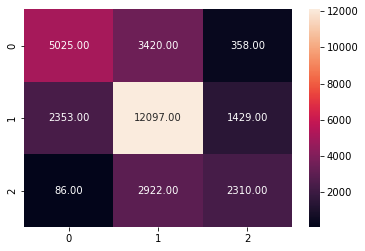

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.67      0.57      0.62      8803
           1       0.66      0.76      0.70     15879
           2       0.56      0.43      0.49      5318

    accuracy                           0.65     30000
   macro avg       0.63      0.59      0.60     30000
weighted avg       0.64      0.65      0.64     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     20195
           1       0.66      0.76      0.71     37295
           2       0.58      0.44      0.50     12510

    accuracy                           0.65     70000
   macro avg       0.63      0.59      0.61     70000
weighted avg       0.65      0.65      0.64     70000

Cohen Kappa Score 0.38997180257026953


In [238]:
train_pred_ada = model_ada.predict(X_train)
test_pred_ada = model_ada.predict(X_test)
train_prob_ada = model_ada.predict(X_train)
test_prob_ada = model_ada.predict_proba(X_test)
class_rep(train_pred_ada,test_pred_ada)

**INFERENCE**

The model's kappa score is less than 0.5 thus there is no substantial agreement between the acutal and predicted values. Thus it is not a good model.

#### AdaBoosting GridSearchCV

In [239]:
ada = AdaBoostClassifier(random_state=0)
params = { 'n_estimators':[50,60,70,80],'learning_rate':[0.5,0.8,1]}
gd_ada = GridSearchCV(estimator=ada , param_grid=params , cv = 2)
model_ada = gd_ada.fit(X_train,y_train)
model_ada.best_params_

{'learning_rate': 0.8, 'n_estimators': 70}

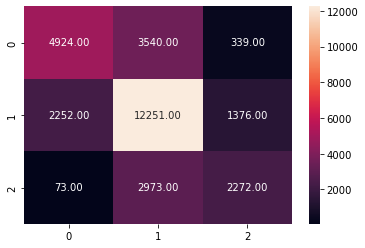

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.68      0.56      0.61      8803
           1       0.65      0.77      0.71     15879
           2       0.57      0.43      0.49      5318

    accuracy                           0.65     30000
   macro avg       0.63      0.59      0.60     30000
weighted avg       0.65      0.65      0.64     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.67      0.56      0.61     20195
           1       0.66      0.77      0.71     37295
           2       0.58      0.43      0.49     12510

    accuracy                           0.65     70000
   macro avg       0.64      0.59      0.60     70000
weighted avg       0.65      0.65      0.64     70000

Cohen Kappa Score 0.38767651079458


In [240]:
train_pred_ada1 = model_ada.predict(X_train)
test_pred_ada1 = model_ada.predict(X_test)
train_prob_ada1 = model_ada.predict(X_train)
test_prob_ada1 = model_ada.predict_proba(X_test)
class_rep(train_pred_ada1,test_pred_ada1)

**INFERENECE**

The Model's kappa score is less than 0.5 and hence we can't rely on this model since there is no substantialagreement between the actual and predicted values.

#### Gradiantboosting Algorithm

In [241]:
gb = GradientBoostingClassifier(random_state=0)
model_gb = gb.fit(X_train,y_train)

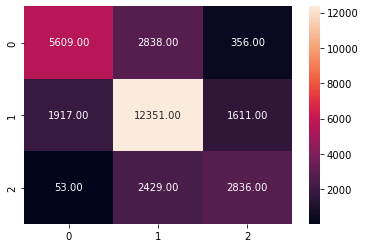

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.74      0.64      0.68      8803
           1       0.70      0.78      0.74     15879
           2       0.59      0.53      0.56      5318

    accuracy                           0.69     30000
   macro avg       0.68      0.65      0.66     30000
weighted avg       0.69      0.69      0.69     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     20195
           1       0.71      0.79      0.75     37295
           2       0.61      0.55      0.58     12510

    accuracy                           0.70     70000
   macro avg       0.69      0.66      0.67     70000
weighted avg       0.70      0.70      0.70     70000

Cohen Kappa Score 0.47702909882861555


In [242]:
train_pred_gb = model_gb.predict(X_train)
test_pred_gb = model_gb.predict(X_test)
train_prob_gb = model_gb.predict(X_train)
test_prob_gb = model_gb.predict_proba(X_test)
class_rep(train_pred_gb,test_pred_gb)

**INFERENCE**

The Model's accuracy is 69% which is less than the best model's accuracy of our,thus this is not a better model for our project.

#### GradientBoosting Param Search

In [250]:
gb = GradientBoostingClassifier(random_state=0,n_estimators=140,max_depth=8)
model_gb1 = gb.fit(X_train,y_train)

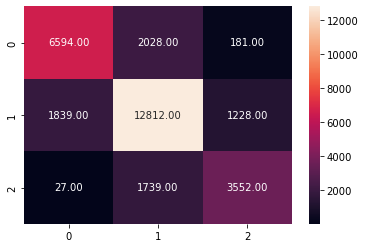

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      8803
           1       0.77      0.81      0.79     15879
           2       0.72      0.67      0.69      5318

    accuracy                           0.77     30000
   macro avg       0.76      0.74      0.75     30000
weighted avg       0.76      0.77      0.76     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     20195
           1       0.88      0.90      0.89     37295
           2       0.89      0.86      0.88     12510

    accuracy                           0.88     70000
   macro avg       0.88      0.87      0.88     70000
weighted avg       0.88      0.88      0.88     70000

Cohen Kappa Score 0.6057744220454944


In [251]:
train_pred_gb1 = model_gb1.predict(X_train)
test_pred_gb1 = model_gb1.predict(X_test)
train_prob_gb1 = model_gb1.predict(X_train)
test_prob_gb1 = model_gb1.predict_proba(X_test)
class_rep(train_pred_gb1,test_pred_gb1)

**INFERENCE**

The Model's accuracy is 77% for the test set and the kappa score is 0.60 which says that there is substantial agreement between the actual and the predicted values, Thus making this Model by far the best Model.

## XGboost Algorithm

In [244]:
xg = XGBClassifier()
model_xg = xg.fit(X_train,y_train)

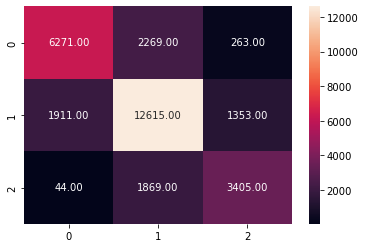

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      8803
           1       0.75      0.79      0.77     15879
           2       0.68      0.64      0.66      5318

    accuracy                           0.74     30000
   macro avg       0.73      0.72      0.72     30000
weighted avg       0.74      0.74      0.74     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     20195
           1       0.82      0.85      0.83     37295
           2       0.79      0.75      0.77     12510

    accuracy                           0.81     70000
   macro avg       0.81      0.79      0.80     70000
weighted avg       0.81      0.81      0.81     70000

Cohen Kappa Score 0.5676096753702176


In [245]:
train_pred_xg = model_xg.predict(X_train)
test_pred_xg = model_xg.predict(X_test)
train_prob_xg = model_xg.predict(X_train)
test_prob_xg = model_xg.predict_proba(X_test)
class_rep(train_pred_xg,test_pred_xg)

**INFERENCE**

`The accuracy of this model is 74% and also the kappa score is greater than 0.5 thus we can say that there is substatial agreement between actual and predicted values, But accuray of this model is less than the Gradient Boosting Param seac`

#### XGboost Params Search

In [256]:
xg = XGBClassifier(gamma = 3 , max_depth=10)
model_xg1 = xg.fit(X_train,y_train)

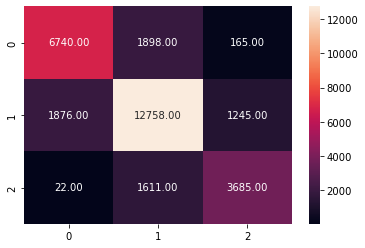

Classification Report of Test Set
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      8803
           1       0.78      0.80      0.79     15879
           2       0.72      0.69      0.71      5318

    accuracy                           0.77     30000
   macro avg       0.76      0.75      0.76     30000
weighted avg       0.77      0.77      0.77     30000

Classification Report of Train Set
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     20195
           1       0.89      0.88      0.89     37295
           2       0.87      0.86      0.86     12510

    accuracy                           0.88     70000
   macro avg       0.87      0.87      0.87     70000
weighted avg       0.88      0.88      0.88     70000

Cohen Kappa Score 0.6202657036021132


In [257]:
train_pred_xg1 = model_xg1.predict(X_train)
test_pred_xg1 = model_xg1.predict(X_test)
train_prob_xg1 = model_xg1.predict(X_train)
test_prob_xg1 = model_xg1.predict_proba(X_test)
class_rep(train_pred_xg1,test_pred_xg1)